In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


%matplotlib inline
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

### Text File explaning What's up
    https://www.kaggle.com/c/dsi-us-5-project-2-regression-challenge/data
    
    - start cleaning numerical columns 
    - take a look at distributions 
    - take a look a correlations with features 
    - take a look at correlations with the response (SalePrice)
    - Run a LR model on at least a couple numerical columns 
    - We are ultimately making the prediction based on the test.csv

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.shape, test.shape

((2051, 81), (879, 80))

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2

### Cleaning Phase I

In [7]:
basements_num_columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF' ]
train[basements_num_columns].corr()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF
BsmtFin SF 1,1.000000,-0.050249,-0.473488,0.538999,0.462198,-0.168015,-0.078362
BsmtFin SF 2,-0.050249,1.000000,-0.231330,0.086545,0.095675,-0.087505,-0.002764
Bsmt Unf SF,-0.473488,-0.231330,1.000000,0.419238,0.302299,-0.012928,0.059575
Total Bsmt SF,0.538999,0.086545,0.419238,1.000000,0.808756,-0.217351,-0.022449
1st Flr SF,0.462198,0.095675,0.302299,0.808756,1.000000,-0.268855,-0.010399
2nd Flr SF,-0.168015,-0.087505,-0.012928,-0.217351,-0.268855,1.000000,0.014645
Low Qual Fin SF,-0.078362,-0.002764,0.059575,-0.022449,-0.010399,0.014645,1.000000


### Analysis to decide how to update Lot Frontage

In [8]:
train['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [9]:
lf_mask_1 = train['Lot Frontage'].isnull()
lf_mask_2 = train[(train['Lot Frontage'].isnull()) & (train['Lot Config'] == 'Corner')]
lf_mask_3 = train[(train['Lot Frontage'].isnull()) & (train['Lot Config'] == 'CulDSac')]
lf_mask_4 = train[(train['Lot Frontage'].isnull()) & (train['Lot Config'] == 'FR2')]
lf_mask_5 = train['Lot Frontage'].isnull()

In [10]:
lf_mask_11 = train['Lot Config'] == 'Inside'
train[lf_mask_11].mean()
6.695278e+01

lf_mask_22 = train['Lot Config'] == 'Corner'
train[lf_mask_22].mean()
8.324555e+01

lf_mask_33 = train['Lot Config'] == 'CulDSac'
train[lf_mask_33].mean()
5.522857e+01

lf_mask_44 = train['Lot Config'] == 'FR2'
train[lf_mask_44].mean()
6.083673e+01


lf_mask_55 = train['Lot Config'] == 'FR3'
train[lf_mask_55].mean()
8.700000e+01

87.0

In [11]:
train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

### Analysis to decide how to update numerical features

In [12]:
train['BsmtFin SF 1'].mean(), test['BsmtFin SF 1'].mean()

train['BsmtFin SF 2'].mean(), test['BsmtFin SF 2'].mean()

train['Bsmt Unf SF'].mean(), test['Bsmt Unf SF'].mean()

train['Total Bsmt SF'].mean(), test['Total Bsmt SF'].mean()

train['Garage Area'].mean(), test['Garage Area'].mean()

train['Bsmt Full Bath'].mean(), test['Bsmt Full Bath'].mean()

train['Bsmt Half Bath'].mean(), test['Bsmt Half Bath'].mean()

train['Garage Cars'].mean(), test['Garage Cars'].mean()

(1.7765853658536586, 1.7440273037542662)

### Float Nan Updates w/ Mean of Feature

In [13]:
train['Garage Area'].fillna(473.6717073170732 , inplace = True)
test['Garage Area'].fillna( 473.6717073170732, inplace = True)

train['Total Bsmt SF'].fillna(1057.9878048780488 , inplace = True)
test['Total Bsmt SF'].fillna( 1057.9878048780488, inplace = True)

train['Bsmt Unf SF'].fillna(567.7282926829268, inplace = True)
test['Bsmt Unf SF'].fillna(567.7282926829268 , inplace = True)

train['BsmtFin SF 2'].fillna( 47.959024390243904, inplace = True)
test['BsmtFin SF 2'].fillna(47.959024390243904, inplace = True)

train['BsmtFin SF 1'].fillna(442.30048780487806 , inplace = True)
test['BsmtFin SF 1'].fillna(442.30048780487806 , inplace = True)

train['Lot Frontage'].fillna(69.055200, inplace = True)
test['Lot Frontage'].fillna(69.055200, inplace= True)

### Float Nan Updates w/ Mode of Feature

In [14]:
train['Bsmt Full Bath'].fillna(0.0 , inplace = True)
test['Bsmt Full Bath'].fillna(0.0 , inplace = True)

train['Bsmt Half Bath'].fillna(0.0 , inplace = True)
test['Bsmt Half Bath'].fillna(0.0 , inplace = True)

train['Garage Cars'].fillna(2.0 , inplace = True)
test['Garage Cars'].fillna(2.0 , inplace = True)

### Object NaN Updates - train

In [15]:
train["Fence"].fillna('NoFence', inplace=True)  
train["Misc Feature"].fillna("no_special_feature", inplace = True) 
train['Mas Vnr Area'].fillna(0.0, inplace = True) 
train['Garage Qual'].fillna("NoGarage", inplace = True) 
train['Garage Cond'].fillna("NoGarage", inplace = True) 
train["Garage Type"].fillna("NoGarage", inplace = True) 
train['Mas Vnr Type'].fillna("None", inplace = True) 
train["Garage Finish"].fillna("NoGarage", inplace = True) 
train["Bsmt Exposure"].fillna("NoBsmt", inplace=True) 
train["Bsmt Cond"].fillna("NoBsmt", inplace=True) 
train["Bsmt Qual"].fillna("NoBsmt", inplace=True) 
train["Alley"].fillna("NoAlleyAccess", inplace = True) 
train['Garage Yr Blt'].fillna(9999.9, inplace= True) # there is no garage, therefore fake yr 
train['Fireplace Qu'].fillna("NoFP", inplace = True) 
train['BsmtFin Type 2'].fillna("NoBsmt", inplace = True) 
train['BsmtFin Type 1'].fillna("NoBsmt", inplace = True) 
train['Pool QC'].fillna("NoPool", inplace = True) 

### Object NaN Updates - test

In [16]:
test["Fence"].fillna('NoFence', inplace=True)  
test["Misc Feature"].fillna("no_special_feature", inplace = True) 
test['Mas Vnr Area'].fillna(0.0, inplace = True) 
test['Garage Qual'].fillna("NoGarage", inplace = True) 
test['Garage Cond'].fillna("NoGarage", inplace = True) 
test["Garage Type"].fillna("NoGarage", inplace = True) 
test['Mas Vnr Type'].fillna("None", inplace = True) 
test["Garage Finish"].fillna("NoGarage", inplace = True) 
test["Bsmt Exposure"].fillna("NoBsmt", inplace=True) 
test["Bsmt Cond"].fillna("NoBsmt", inplace=True) 
test["Bsmt Qual"].fillna("NoBsmt", inplace=True) 
test["Alley"].fillna("NoAlleyAccess", inplace = True) 
test['Garage Yr Blt'].fillna(9999.9, inplace= True) # there is no garage, therefore fake yr 
test['Fireplace Qu'].fillna("NoFP", inplace = True) 
test['BsmtFin Type 2'].fillna("NoBsmt", inplace = True) 
test['BsmtFin Type 1'].fillna("NoBsmt", inplace = True) 
test['Pool QC'].fillna("NoPool", inplace = True) 

### EDA - First Round Visualizations

In [17]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


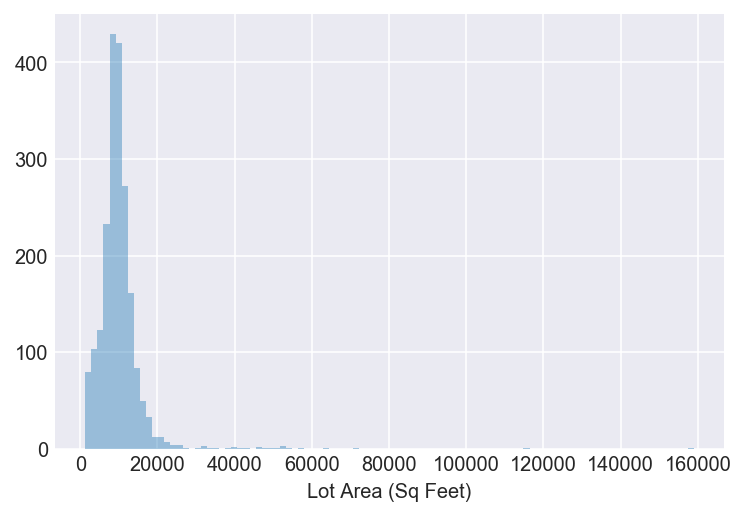

In [18]:
sns.distplot(train['Lot Area'], bins = 100, kde=False, axlabel = 'Lot Area (Sq Feet)');

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


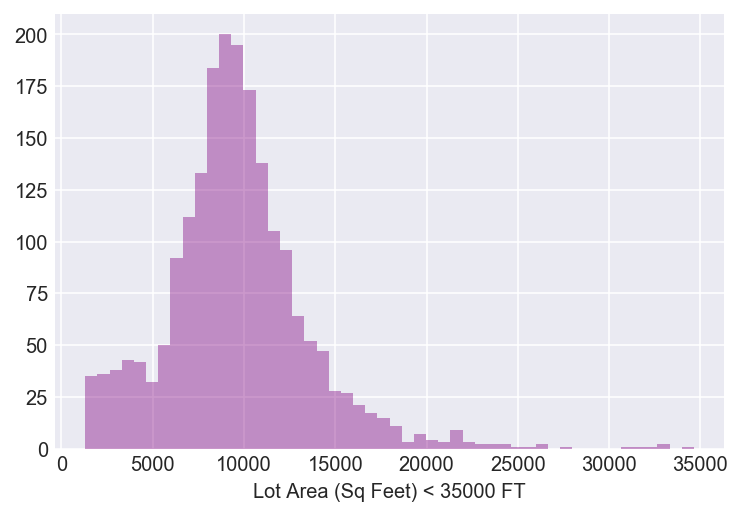

In [19]:
lot_area_mask = train['Lot Area'] < 35000
sns.distplot(train[lot_area_mask]['Lot Area'], kde=False, color = 'purple', axlabel = "Lot Area (Sq Feet) < 35000 FT")

In [20]:
# YEAR BUILT & REMODEL YEAR  
percent_no_remodel = 1101 / 2051
percent_1yr_remodel = 309 / 2051

print("The % of homes that have never been remodeled are:", percent_no_remodel)
print("The % of homes that were remodeled 1 year after they were built are:", percent_1yr_remodel)

years_since_remodel = train['Year Remod/Add'] - train['Year Built']
years_since_remodel.value_counts()[0:10]

The % of homes that have never been remodeled are: 0.5368113115553389
The % of homes that were remodeled 1 year after they were built are: 0.15065821550463188


0     1101
1      309
30      26
35      20
40      20
10      17
25      17
26      16
9       15
20      15
dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


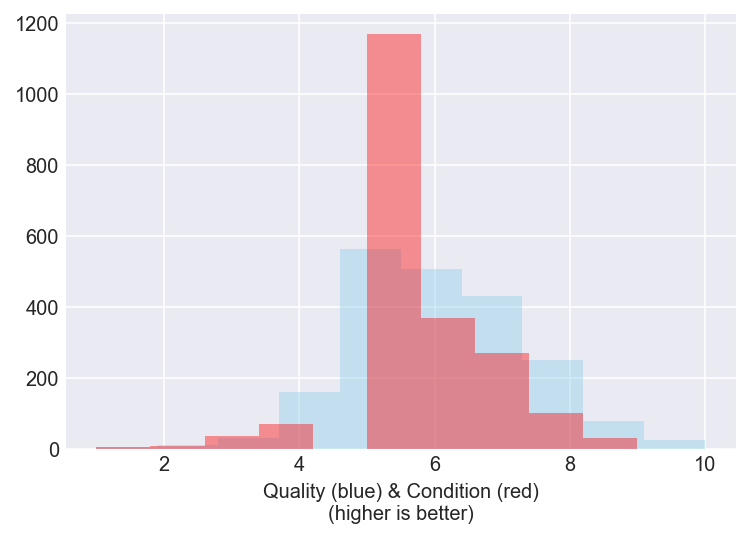

In [21]:
# OVERALL QUALITY AND OVERALL CONDITION 
sns.distplot(train['Overall Qual'], bins=10, color="skyblue", kde=False)
sns.distplot(train['Overall Cond'], bins = 10, color="red", kde=False, 
             axlabel= "Quality (blue) & Condition (red)\n(higher is better)");


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


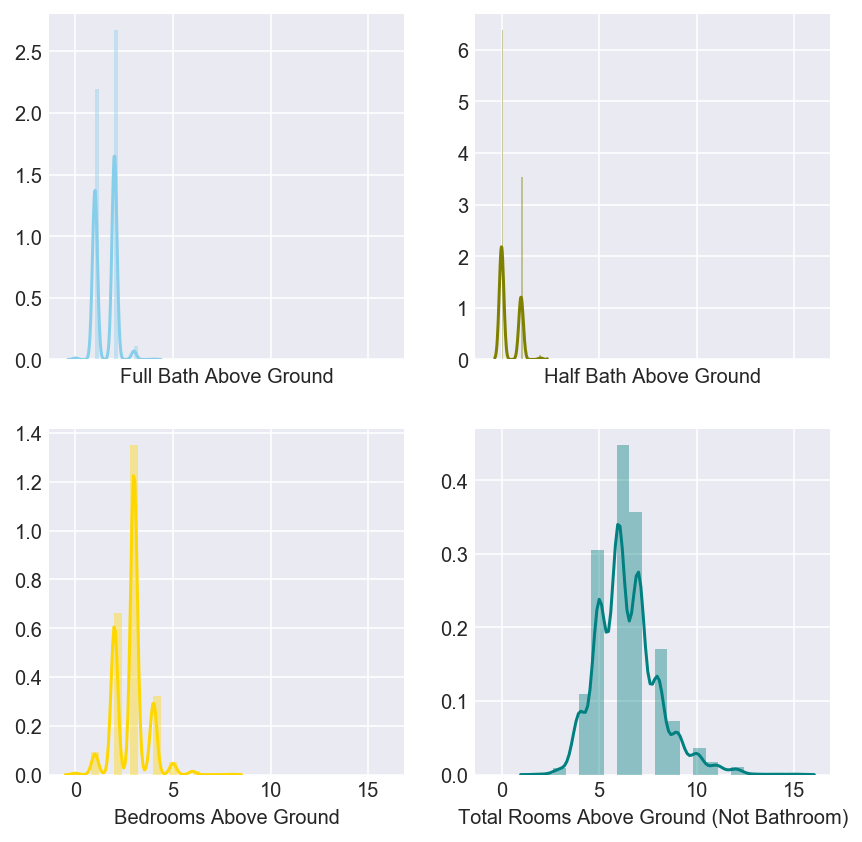

In [22]:

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( train["Full Bath"] , color="skyblue", bins=20, axlabel = "Full Bath Above Ground", ax=axes[0, 0])
sns.distplot( train["Half Bath"] , color="olive", bins=20, axlabel = "Half Bath Above Ground" , ax=axes[0, 1])
sns.distplot( train["Bedroom AbvGr"] , color="gold", bins=20, axlabel = "Bedrooms Above Ground" ,ax=axes[1, 0])
sns.distplot( train["TotRms AbvGrd"] , color="teal", bins=20, axlabel = "Total Rooms Above Ground (Not Bathroom)", ax=axes[1, 1]);


In [23]:
# MISC VALUE ($) Mask 
misc_val_mask = train["Misc Val"] >= 1000
train[misc_val_mask]["Misc Val"].describe()

count       21.000000
mean      4007.142857
std       4065.596073
min       1150.000000
25%       2000.000000
50%       2500.000000
75%       4500.000000
max      17000.000000
Name: Misc Val, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


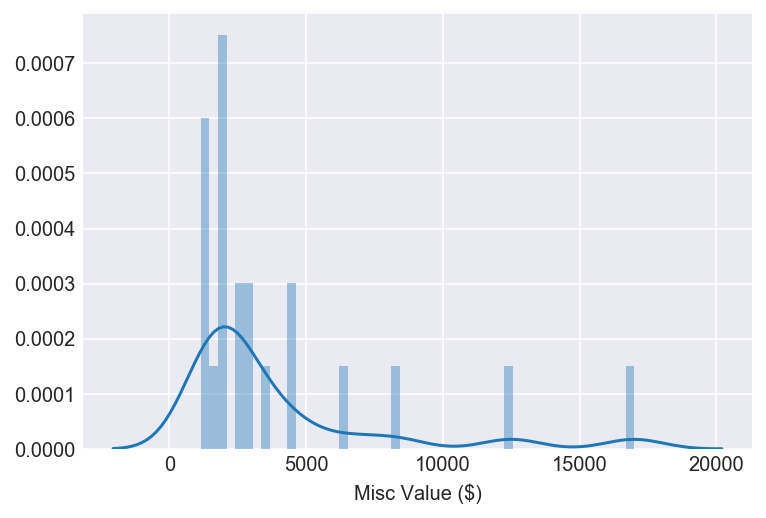

In [24]:
sns.distplot(train[misc_val_mask]["Misc Val"], bins = 50, axlabel = "Misc Value ($)");

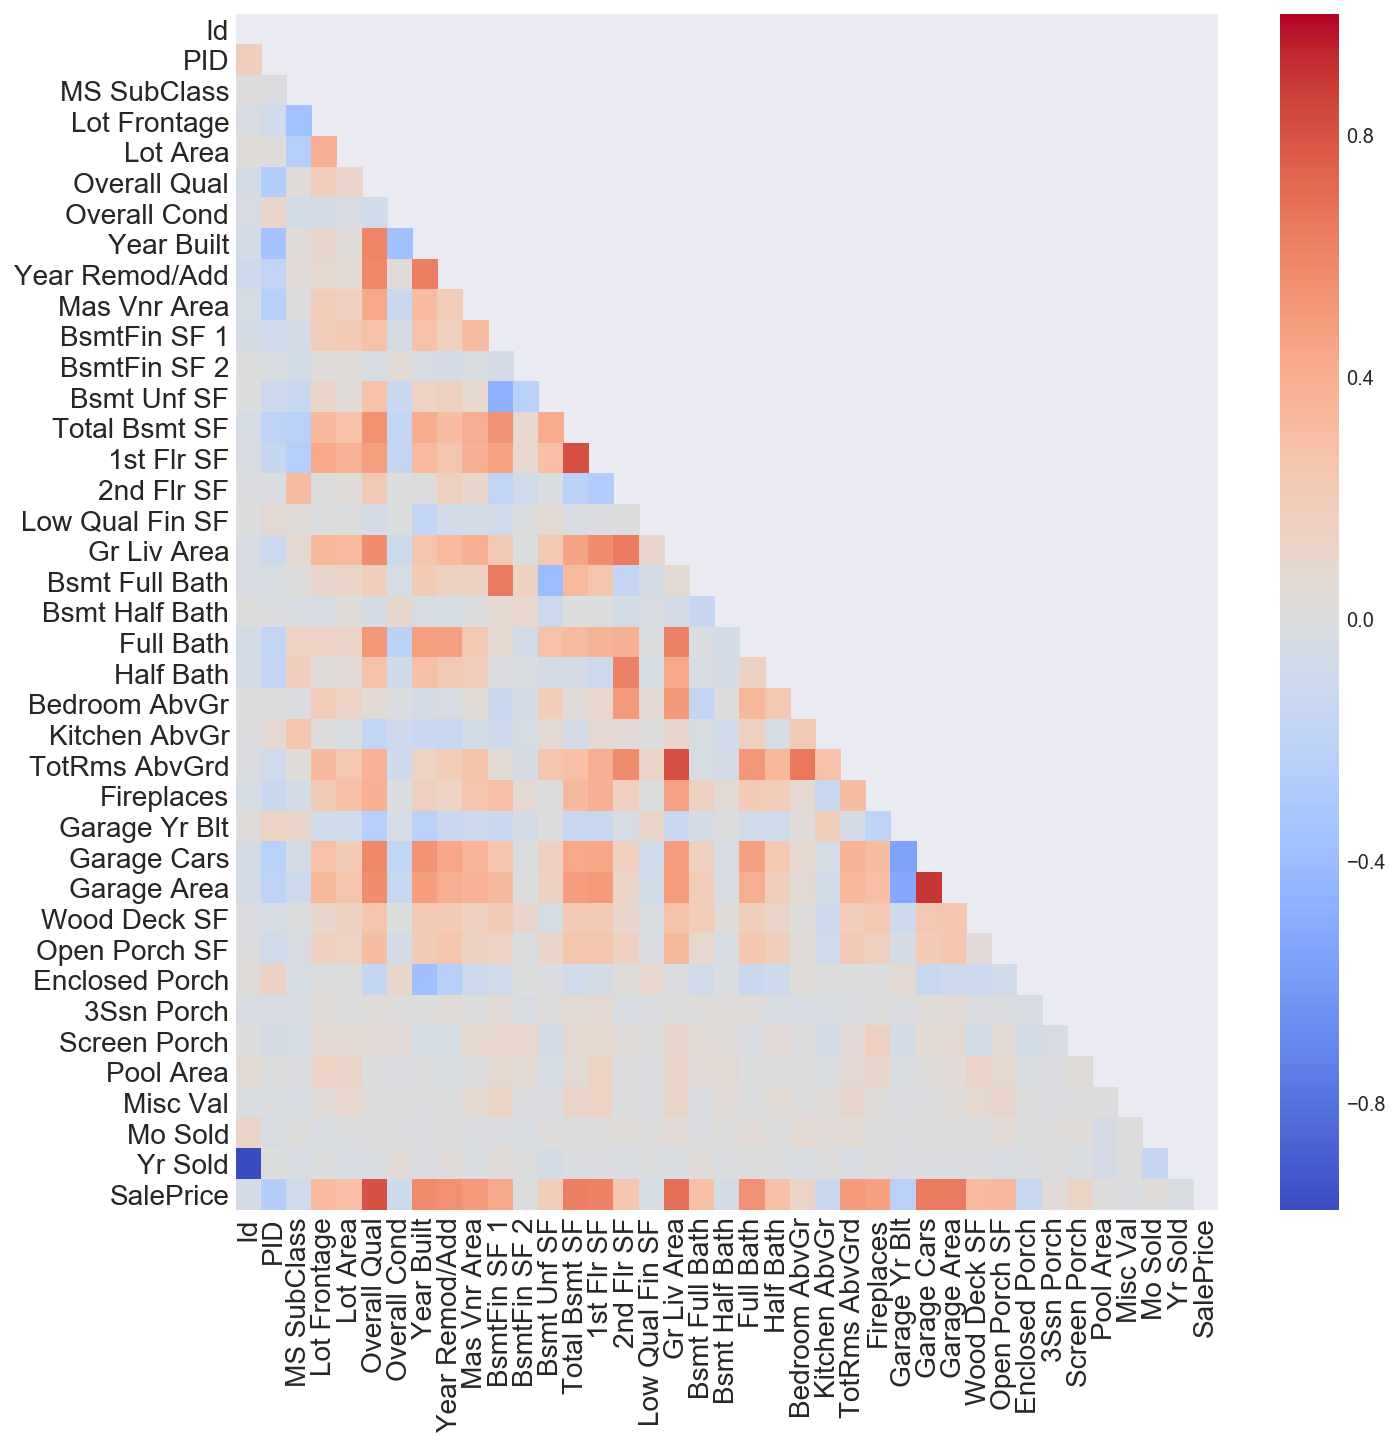

In [25]:
## Heat Map 

house_corr = train.corr()

fig, ax = plt.subplots(figsize = (11, 11))

mask = np.zeros_like(house_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True   


ax = sns.heatmap(house_corr, mask = mask, ax = ax,  cmap = 'coolwarm')


ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### Fake Submission Test 1

In [26]:
train_submission = train
test_submission = test

In [27]:
X = train_submission[["Yr Sold"]]
y = train_submission['SalePrice']

X_sub = test_submission[["Yr Sold"]]


In [28]:
model_test = LinearRegression()

model_test.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_hat = model_test.predict(X_sub)

In [30]:
submission_1 = pd.DataFrame(index = test_submission['Id'])

In [31]:
submission_1['SalePrice'] = y_hat

In [32]:
submission_1.head()

,SalePrice
Id,
2658,183100.567395
2718,183100.567395
2414,183100.567395
1989,182182.141880
625,180345.290849


In [33]:
submission_1.to_csv('../project-2/submission_1.csv')